##**Import Packages** 

In [ ]:
import numpy as np
import tensorflow as tf
import pandas as pd
import os
import matplotlib.pyplot as plt
import re
import wordcloud
from wordcloud import WordCloud
from sklearn import utils

##**Load the data**

In [ ]:
train_data=pd.read_csv(os.path.join('drive/MyDrive/deep_learning_projects/data/train.csv'))
test_data=pd.read_csv(os.path.join('drive/MyDrive/deep_learning_projects/data/test.csv'))

##**Data Analysis and visualization**

In [ ]:
print(train_data.shape)
print(test_data.shape)


(159571, 8)
(153164, 2)


In [ ]:
train_data.head(20)

id  ... identity_hate
0   0000997932d777bf  ...             0
1   000103f0d9cfb60f  ...             0
2   000113f07ec002fd  ...             0
3   0001b41b1c6bb37e  ...             0
4   0001d958c54c6e35  ...             0
5   00025465d4725e87  ...             0
6   0002bcb3da6cb337  ...             0
7   00031b1e95af7921  ...             0
8   00037261f536c51d  ...             0
9   00040093b2687caa  ...             0
10  0005300084f90edc  ...             0
11  00054a5e18b50dd4  ...             0
12  0005c987bdfc9d4b  ...             0
13  0006f16e4e9f292e  ...             0
14  00070ef96486d6f9  ...             0
15  00078f8ce7eb276d  ...             0
16  0007e25b2121310b  ...             0
17  000897889268bc93  ...             0
18  0009801bd85e5806  ...             0
19  0009eaea3325de8c  ...             0

[20 rows x 8 columns]

In [ ]:
test_data.head(5)  #it for evaluation by kaggle

id                                       comment_text
0  00001cee341fdb12  Yo bitch Ja Rule is more succesful then you'll...
1  0000247867823ef7  == From RfC == \n\n The title is fine as it is...
2  00013b17ad220c46  " \n\n == Sources == \n\n * Zawe Ashton on Lap...
3  00017563c3f7919a  :If you have a look back at the source, the in...
4  00017695ad8997eb          I don't anonymously edit articles at all.

In [ ]:
train_data.describe()

toxic   severe_toxic  ...         insult  identity_hate
count  159571.000000  159571.000000  ...  159571.000000  159571.000000
mean        0.095844       0.009996  ...       0.049364       0.008805
std         0.294379       0.099477  ...       0.216627       0.093420
min         0.000000       0.000000  ...       0.000000       0.000000
25%         0.000000       0.000000  ...       0.000000       0.000000
50%         0.000000       0.000000  ...       0.000000       0.000000
75%         0.000000       0.000000  ...       0.000000       0.000000
max         1.000000       1.000000  ...       1.000000       1.000000

[8 rows x 6 columns]

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [ ]:
#print first text
train_data['comment_text'][0]

"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"

In [ ]:
#print forth text
train_data['comment_text'][3]

'"\nMore\nI can\'t make any real suggestions on improvement - I wondered if the section statistics should be later on, or a subsection of ""types of accidents""  -I think the references may need tidying so that they are all in the exact same format ie date format etc. I can do that later on, if no-one else does first - if you have any preferences for formatting style on references or want to do it yourself please let me know.\n\nThere appears to be a backlog on articles for review so I guess there may be a delay until a reviewer turns up. It\'s listed in the relevant form eg Wikipedia:Good_article_nominations#Transport  "'

In [ ]:
#print value counts for all columns
for i in train_data.columns[2:]:
    print(f'{i}')
    print(f'{train_data[i].value_counts()}')
    print('\n')

toxic
0    144277
1     15294
Name: toxic, dtype: int64


severe_toxic
0    157976
1      1595
Name: severe_toxic, dtype: int64


obscene
0    151122
1      8449
Name: obscene, dtype: int64


threat
0    159093
1       478
Name: threat, dtype: int64


insult
0    151694
1      7877
Name: insult, dtype: int64


identity_hate
0    158166
1      1405
Name: identity_hate, dtype: int64




In [ ]:
#another way of value count for each column
data_count=train_data.iloc[:,2:].sum()
print(data_count)
print(list(data_count.keys()))
print(list(data_count.values))

toxic            15294
severe_toxic      1595
obscene           8449
threat             478
insult            7877
identity_hate     1405
dtype: int64
['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
[15294, 1595, 8449, 478, 7877, 1405]


<BarContainer object of 6 artists>

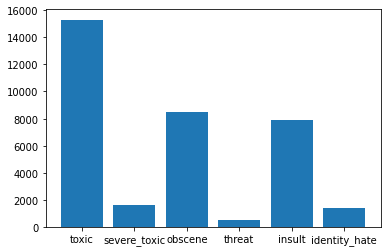

In [ ]:
#plot in bar graph
plt.bar(list(data_count.keys()),list(data_count.values))

##**Preprocess the data**

In [ ]:
#substitute all alphanumberic values with space
remove_alnum=lambda x: re.sub('\w*\d\w',' ',x)  #match the words with regex sequence

#convert into lower case
to_lower=lambda x: x.lower()

#substitute all '\n' with the space
remove_newline=lambda x: re.sub('\n',' ', x)

train_data['comment_text']=train_data['comment_text'].map(remove_alnum).map(to_lower).map(remove_newline)

In [ ]:
train_data['comment_text'][0]

"explanation why the edits made under my username hardcore metallica fan were reverted? they weren't vandalisms, just closure on some gas after i voted at new york dolls fac. and please don't remove the template from the talk page since i'm retired now. . . . "

In [ ]:
train_data['comment_text'][3]

'" more i can\'t make any real suggestions on improvement - i wondered if the section statistics should be later on, or a subsection of ""types of accidents""  -i think the references may need tidying so that they are all in the exact same format ie date format etc. i can do that later on, if no-one else does first - if you have any preferences for formatting style on references or want to do it yourself please let me know.  there appears to be a backlog on articles for review so i guess there may be a delay until a reviewer turns up. it\'s listed in the relevant form eg wikipedia:good_article_nominations#transport  "'

##**Create word cloud to see words in each category apearning the most**

####**Create 6 separate datasets for each category**

In [ ]:
train_data.head(5)

id  ... identity_hate
0  0000997932d777bf  ...             0
1  000103f0d9cfb60f  ...             0
2  000113f07ec002fd  ...             0
3  0001b41b1c6bb37e  ...             0
4  0001d958c54c6e35  ...             0

[5 rows x 8 columns]

In [ ]:
data_toxic=train_data.iloc[:,:3]

In [ ]:
data_sevtoxic=train_data.loc[:,['id','comment_text','severe_toxic']]

In [ ]:
data_obscene=train_data.loc[:,['id','comment_text','obscene']]

In [ ]:
data_threat=train_data.loc[:,['id','comment_text','threat']]

In [ ]:
data_insult=train_data.loc[:,['id','comment_text','insult']]

In [ ]:
data_idhate=train_data.loc[:,['id','comment_text','identity_hate']]

####**Create word cloud**

In [ ]:
datase=data_toxic[data_toxic['toxic']==1].comment_text


In [ ]:
def wordcloud(dataset,label):
    text=dataset[dataset[label]==1].comment_text.values  #creates list of all sentences of one label of comment
    wc=WordCloud().generate(' '.join(text))   #.join() here joins all sentences from list by space to a single string
    plt.imshow(wc,interpolation='bilinear')
    plt.axis('off')
    plt.show()

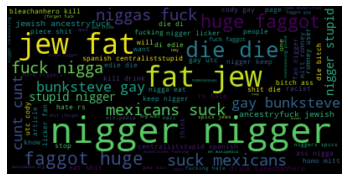

In [ ]:
wordcloud(data_idhate,'identity_hate')

##**Create a balanced dataset**

In [ ]:
#balanced data for toxic
data_toxic_0=data_toxic[data_toxic['toxic']==0].iloc[:5000,:]
data_toxic_1=data_toxic[data_toxic['toxic']==1].iloc[:5000,:]
data_toxic_balanced=pd.concat([data_toxic_0,data_toxic_1])
print(data_toxic_balanced.shape)

data_toxic_balanced=utils.shuffle(data_toxic_balanced,random_state=48)
data_toxic_balanced.head(10)

(10000, 3)


id  ... toxic
398    00fa6072f2eb086b  ...     0
40138  6b1fce15f888a487  ...     1
2207   05ffc9ec106ecd6e  ...     0
1607   044df95de9cc9daa  ...     0
1719   04aa3354e0bff7da  ...     0
18565  30fcf9fc2ff0e679  ...     1
44770  779cf821fbd61418  ...     1
838    024859995cf6379e  ...     0
37305  6398a98569c2bf37  ...     1
33200  5864d1bbd9f030d0  ...     1

[10 rows x 3 columns]

In [ ]:
#balanced data for severe_toxic
data_sevtoxic_0=data_sevtoxic[data_sevtoxic['severe_toxic']==0].iloc[:1595,:]
data_sevtoxic_1=data_sevtoxic[data_sevtoxic['severe_toxic']==1]
data_sevtoxic_balanced=pd.concat([data_sevtoxic_0,data_sevtoxic_1])
print(data_sevtoxic_balanced.shape)

data_sevtoxic_balanced=utils.shuffle(data_sevtoxic_balanced,random_state=48)

(3190, 3)


In [ ]:
#balanced data for obscene
data_obscene_0=data_obscene[data_obscene['obscene']==0].iloc[:5000,:]
data_obscene_1=data_obscene[data_obscene['obscene']==1].iloc[:5000,:]
data_obscene_balanced=pd.concat([data_obscene_0,data_obscene_1])
print(data_obscene_balanced.shape)

data_obscene_balanced=utils.shuffle(data_obscene_balanced,random_state=48)

(10000, 3)


In [ ]:
#balanced data for threat
data_threat_0=data_threat[data_threat['threat']==0].iloc[:1200,:]
data_threat_1=data_threat[data_threat['threat']==1]
data_threat_balanced=pd.concat([data_threat_0,data_threat_1])
print(data_threat_balanced.shape)

data_threat_balanced=utils.shuffle(data_threat_balanced,random_state=48)

(1678, 3)


In [ ]:
#balanced data for insult
data_insult_0=data_insult[data_insult['insult']==0].iloc[:5000,:]
data_insult_1=data_insult[data_insult['insult']==1].iloc[:5000,:]
data_insult_balanced=pd.concat([data_insult_0,data_insult_1])
print(data_insult_balanced.shape)

data_insult_balanced=utils.shuffle(data_insult_balanced,random_state=48)

(10000, 3)


In [ ]:
#balanced data for identity hate
data_idhate_0=data_idhate[data_idhate['identity_hate']==0].iloc[:2501,:]
data_idhate_1=data_idhate[data_idhate['identity_hate']==1]
data_idhate_balanced=pd.concat([data_idhate_0,data_idhate_1])


data_idhate_balanced=utils.shuffle(data_idhate_balanced,random_state=48)
print(data_idhate_balanced.shape)
data_idhate_balanced.head(5)

(3906, 3)


id  ... identity_hate
59279  9ecf3329158e0276  ...             1
2252   0617a8b319fde352  ...             0
1094   02fcd5c28005823d  ...             0
2168   05deec00d640ca08  ...             0
2089   05a6e59c979e05f3  ...             0

[5 rows x 3 columns]

##**Model**

In [ ]:
!pip install tensorflow_text

     |████████████████████████████████| 4.9 MB 39.0 MB/s 


In [ ]:
import tensorflow_hub as hub
import tensorflow_text as text

In [ ]:
preprocessor_url='https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3'
encoder_url='https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4'

bert_preprocess_model=hub.KerasLayer(preprocessor_url)
bert_model=hub.KerasLayer(encoder_url)

In [ ]:
#function for returning embedding of sentences
def get_sentence_embedding(sentence):
    text_preprocessed=bert_preprocess_model(sentence)
    
    return bert_model(text_preprocessed)['pooled_output']

get_sentence_embedding(['hello, i love programming','that was disgusting'])

<tf.Tensor: shape=(2, 768), dtype=float32, numpy=
array([[-0.84611744, -0.33594748, -0.62099296, ..., -0.26822835,
        -0.6329665 ,  0.8857859 ],
       [-0.77555734, -0.12828745,  0.41623503, ...,  0.24994856,
        -0.49263793,  0.84424746]], dtype=float32)>

In [ ]:
a=get_sentence_embedding([
                          'apple',
                          'orange',
                          'elon musk',
                          'bill gates'
])

from sklearn.metrics.pairwise import cosine_similarity

print(cosine_similarity([a[0]],[a[1]])) #apple and orange
print(cosine_similarity([a[0]],[a[2]])) #apple and  elon musk

[[0.9901811]]
[[0.96241546]]


In [ ]:
#train/test split
from sklearn.model_selection import train_test_split

X_toxic=data_toxic_balanced.iloc[:,1:2]
Y_toxic=data_toxic_balanced.iloc[:,2:]

X_sevtoxic=data_sevtoxic_balanced.iloc[:,1:2]
Y_sevtoxic=data_sevtoxic_balanced.iloc[:,2:]

X_obscene=data_obscene_balanced.iloc[:,1:2]
Y_obscene=data_obscene_balanced.iloc[:,2:]

X_threat=data_threat_balanced.iloc[:,1:2]
Y_threat=data_threat_balanced.iloc[:,2:]

X_insult=data_insult_balanced.iloc[:,1:2]
Y_insult=data_insult_balanced.iloc[:,2:]

X_idhate=data_idhate_balanced.iloc[:,1:2]
Y_idhate=data_idhate_balanced.iloc[:,2:]


X_train_toxic, X_test_toxic, y_train_toxic, y_test_toxic = train_test_split(X_toxic, Y_toxic, test_size=0.33, random_state=42)
X_train_sevtoxic, X_test_sevtoxic, y_train_sevtoxic, y_test_sevtoxic = train_test_split(X_sevtoxic, Y_sevtoxic, test_size=0.2, random_state=42)
X_train_obscene, X_test_obscene, y_train_obscene, y_test_obscene = train_test_split(X_obscene, Y_obscene, test_size=0.33, random_state=42)
X_train_threat, X_test_threat, y_train_threat, y_test_threat = train_test_split(X_threat, Y_threat, test_size=0.2, random_state=42)
X_train_insult, X_test_insult, y_train_insult, y_test_insult = train_test_split(X_insult, Y_insult, test_size=0.33, random_state=42)
X_train_idhate, X_test_idhate, y_train_idhate, y_test_idhate = train_test_split(X_idhate, Y_idhate, test_size=0.2, random_state=42)

In [ ]:
#model (bert layers)

#input layer
text_input=tf.keras.layers.Input(shape=(),dtype=tf.string,name='comments')
#pass the input layer to the bert preprocess
preprocessed_text=bert_preprocess_model(text_input)

#pass the preprocessed input text to the encoder
outputs=bert_model(preprocessed_text)

#(neural network layers)
l=tf.keras.layers.Dropout(0.1, name='dropout')(outputs['pooled_output'])
l=outputs=tf.keras.layers.Dense(1,'sigmoid',name='dense')(l)


#build the models for varous categories
model_toxic=tf.keras.Model(inputs=[text_input],outputs=[l])
model_sevtoxic=tf.keras.Model(inputs=[text_input],outputs=[l])
model_obscene=tf.keras.Model(inputs=[text_input],outputs=[l])
model_threat=tf.keras.Model(inputs=[text_input],outputs=[l])
model_insult=tf.keras.Model(inputs=[text_input],outputs=[l])
model_idhate=tf.keras.Model(inputs=[text_input],outputs=[l])

In [ ]:
model_toxic.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 comments (InputLayer)          [(None,)]            0           []                               
                                                                                                  
 keras_layer (KerasLayer)       {'input_mask': (Non  0           ['comments[0][0]']               
                                e, 128),                                                          
                                 'input_word_ids':                                                
                                (None, 128),                                                      
                                 'input_type_ids':                                                
                                (None, 128)}                                                  

In [ ]:
METRICS=[
         tf.keras.metrics.AUC(name='auc')
]

model_toxic.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=METRICS)

In [ ]:
METRICS=[
         tf.keras.metrics.AUC(name='auc')
]

model_sevtoxic.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=METRICS)

In [ ]:
METRICS=[
         tf.keras.metrics.AUC(name='auc')
]

model_obscene.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=METRICS)

In [ ]:
METRICS=[
         tf.keras.metrics.AUC(name='auc')
]

model_threat.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=METRICS)

In [ ]:
METRICS=[
         tf.keras.metrics.AUC(name='auc')
]

model_insult.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=METRICS)

In [ ]:
METRICS=[
         tf.keras.metrics.AUC(name='auc')
]

model_idhate.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=METRICS)

In [ ]:
model_toxic.fit(X_train_toxic,y_train_toxic,epochs=2)

Epoch 1/2
210/210 [==============================] - 2363s 11s/step - loss: 0.6075 - auc: 0.7374
Epoch 2/2
210/210 [==============================] - 2382s 11s/step - loss: 0.5084 - auc: 0.8504


In [ ]:
model_sevtoxic.fit(X_train_sevtoxic,y_train_sevtoxic,epochs=3)

Epoch 1/3
80/80 [==============================] - 942s 12s/step - loss: 0.3652 - auc: 0.9417
Epoch 2/3
80/80 [==============================] - 926s 12s/step - loss: 0.3312 - auc: 0.9495
Epoch 3/3
80/80 [==============================] - 932s 12s/step - loss: 0.3199 - auc: 0.9488


In [ ]:
model_obscene.fit(X_train_obscene,y_train_obscene,epochs=2)

Epoch 1/2
210/210 [==============================] - 2426s 12s/step - loss: 0.3830 - auc: 0.9158
Epoch 2/2
210/210 [==============================] - 2494s 12s/step - loss: 0.3679 - auc: 0.9220


In [ ]:
model_threat.fit(X_train_threat,y_train_threat,epochs=3)

Epoch 1/3
42/42 [==============================] - 501s 12s/step - loss: 0.3242 - auc: 0.9241
Epoch 2/3
42/42 [==============================] - 502s 12s/step - loss: 0.3071 - auc: 0.9335
Epoch 3/3
42/42 [==============================] - 502s 12s/step - loss: 0.2943 - auc: 0.9396


In [ ]:
model_insult.fit(X_train_insult,y_train_insult,epochs=2)

Epoch 1/2
210/210 [==============================] - 2601s 12s/step - loss: 0.3466 - auc: 0.9283
Epoch 2/2
210/210 [==============================] - 2657s 13s/step - loss: 0.3372 - auc: 0.9320


In [ ]:
model_idhate.fit(X_train_idhate,y_train_idhate,epochs=3)

Epoch 1/3
98/98 [==============================] - 1235s 13s/step - loss: 0.3699 - auc: 0.9091
Epoch 2/3
98/98 [==============================] - 1206s 12s/step - loss: 0.3526 - auc: 0.9181
Epoch 3/3
98/98 [==============================] - 1207s 12s/step - loss: 0.3538 - auc: 0.9174


In [ ]:
model_sevtoxic.evaluate(X_test_sevtoxic,y_test_sevtoxic)

20/20 [==============================] - 258s 13s/step - loss: 0.2572 - auc: 0.9787


[0.2571830749511719, 0.9787135720252991]

In [ ]:
model_threat.evaluate(X_test_threat,y_test_threat)

11/11 [==============================] - 131s 12s/step - loss: 0.3589 - auc: 0.9647


[0.35892176628112793, 0.9647108316421509]

In [ ]:
model_idhate.evaluate(X_test_idhate,y_test_idhate)

25/25 [==============================] - 308s 12s/step - loss: 0.3790 - auc: 0.9301


[0.37904128432273865, 0.9300737977027893]

In [ ]:
def predict_toxicity(sentences):
    print(f'toxic:{model_toxic.predict(sentences)}')
    print(f'severe_toxic:{model_sevtoxic.predict(sentences)}')
    print(f'obscene:{model_obscene.predict(sentences)}')
    print(f'threat:{model_threat.predict(sentences)}')
    print(f'insult:{model_insult.predict(sentences)}')
    print(f'identity_hate:{model_idhate.predict(sentences)}')

In [ ]:
predict_toxicity(['you can kindly implement this'])

toxic:[[0.29636264]]
severe_toxic:[[0.29636264]]
obscene:[[0.29636264]]
threat:[[0.29636264]]


insult:[[0.29636264]]


identity_hate:[[0.29636264]]
